In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight') 

In [2]:
quandl.ApiConfig.api_key = 'PD7xffXnY1d78ityz6Nj'

#### #2 Import quandl dataset

Dataset Description: The Big Mac index was invented by The Economist in 1986 as a lighthearted guide to whether currencies are at their “correct” level. It is based on the theory of purchasing-power parity (PPP).

I chose this time-series data because the boat data had prices in different currencies that I decided to convert all to euros. This data focuses on the Euro area (European Union) which uses euros as its currency.

In [13]:
data = quandl.get('ECONOMIST/BIGMAC_EUR')

In [4]:
data

,local_price,dollar_ex,dollar_price,dollar_ppp,dollar_valuation,dollar_adj_valuation,euro_adj_valuation,sterling_adj_valuation,yen_adj_valuation,yuan_adj_valuation
Date,,,,,,,,,,
2000-04-30,2.560000,1.075269,2.380000,1.019920,-5.147410,NaN,NaN,NaN,NaN,NaN
2001-04-30,2.570000,1.136364,2.270000,1.011811,-10.960630,NaN,NaN,NaN,NaN,NaN
2002-04-30,2.670000,1.123596,2.370000,1.072289,-4.566265,NaN,NaN,NaN,NaN,NaN
2003-04-30,2.710000,0.909091,2.980000,1.000000,10.000000,NaN,NaN,NaN,NaN,NaN
2004-05-31,2.740000,0.833333,3.280000,0.944828,13.379310,NaN,NaN,NaN,NaN,NaN
2005-06-30,2.920000,0.814930,3.583132,0.954248,17.095817,NaN,NaN,NaN,NaN,NaN
2006-01-31,2.910000,0.828157,3.513825,0.923810,11.550000,NaN,NaN,NaN,NaN,NaN
2006-05-31,2.939574,0.780366,3.766916,0.948250,21.513435,NaN,NaN,NaN,NaN,NaN
2007-01-31,2.940000,0.771813,3.809211,0.913043,18.298478,NaN,NaN,NaN,NaN,NaN


The data contains annual or semi-annual updates of local price with comparison to other currencies starting in 2000 and ending in 2022 (no forecasting). The date column is the index, as it should be.

In [5]:
data.shape

(37, 10)

In [6]:
data.columns

Index(['local_price', 'dollar_ex', 'dollar_price', 'dollar_ppp',
       'dollar_valuation', 'dollar_adj_valuation', 'euro_adj_valuation',
       'sterling_adj_valuation', 'yen_adj_valuation', 'yuan_adj_valuation'],
      dtype='object')

In [7]:
type(data)

pandas.core.frame.DataFrame

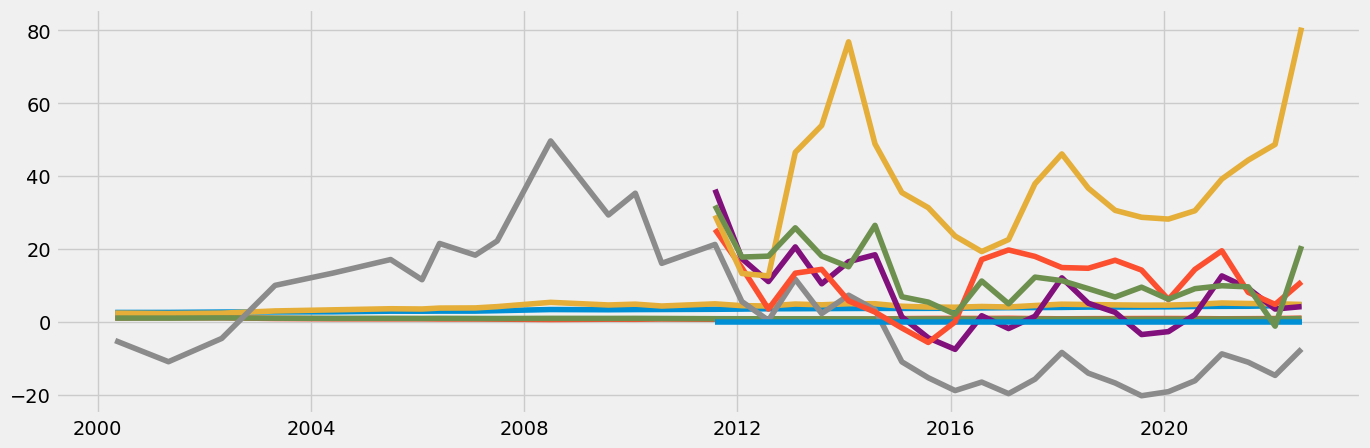

In [8]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

Focus on local price variable only

In [17]:
data = data[['local_price']]

In [18]:
type(data)

pandas.core.frame.DataFrame

In [19]:
data

,local_price
Date,
2000-04-30,2.560000
2001-04-30,2.570000
2002-04-30,2.670000
2003-04-30,2.710000
2004-05-31,2.740000
2005-06-30,2.920000
2006-01-31,2.910000
2006-05-31,2.939574
2007-01-31,2.940000


In [20]:
data.shape

(37, 1)

In [21]:
data.columns

Index(['local_price'], dtype='object')

#### #3 Not necessary to subset data

In [23]:
data.isnull().sum()

local_price    0
dtype: int64

In [24]:
data.duplicated().sum()

0

All years are of interest. There are no missing values or duplicated data.

#### #4 Line chart

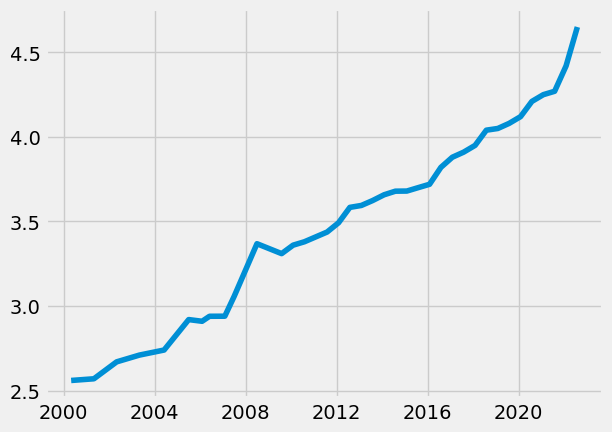

In [25]:
plt.plot(data)

There appears to be an upward trend.

#### #5 Decomposition

In [51]:
decomposition = sm.tsa.seasonal_decompose(data, model='additive', period=2)
#include period=2 because in most years two dates are given

In [33]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

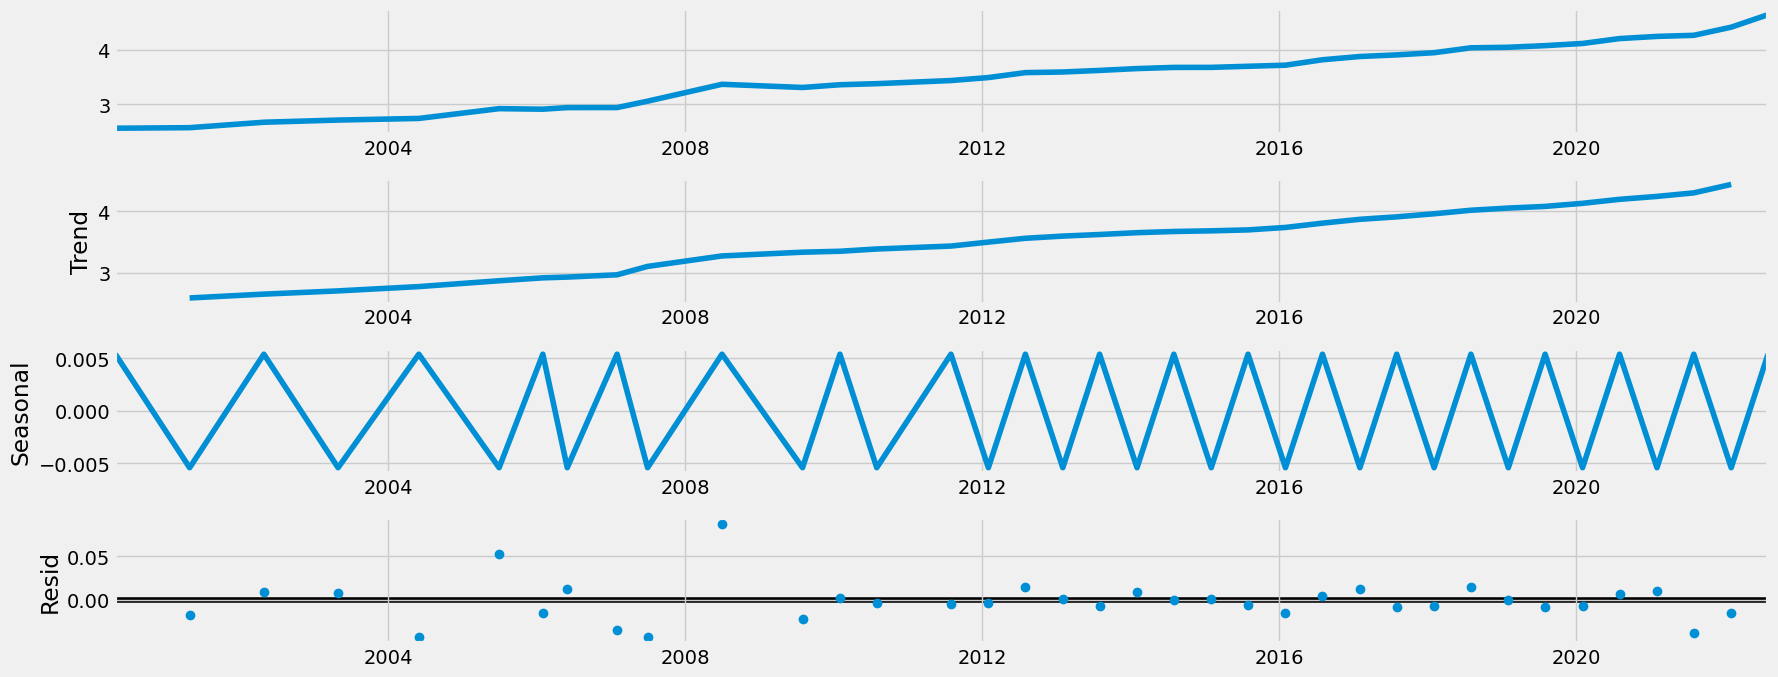

In [52]:
decomposition.plot()
plt.show()

The level and trend do not differ much meaning that the data does not have much noise and therefore does not need to be smoothed.

The trend, as suspected, is up all the way from 2000 to the present year. 

Seasonality does show some fluctuation, not all at regular intervals.

There is some noise between about 2004 and 2010, perhaps due to the 2008 financial crisis.

#### #6 Test for stationarity

In [53]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['local_price'])

Dickey-Fuller Stationarity test:
Test Statistic                  0.168954
p-value                         0.970466
Number of Lags Used             0.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64


Using a significance level of 5%, the critical value is about -2.946. This is much less than the test statistic (.169) meaning we can't reject the null hypothesis, meaning the data is non-stationary.

#### #7 Stationarizing the data

In [54]:
data_diff = data - data.shift(1)

In [55]:
data_diff.dropna(inplace = True)

In [56]:
data_diff.head()

,local_price
Date,
2001-04-30,0.01
2002-04-30,0.10
2003-04-30,0.04
2004-05-31,0.03
2005-06-30,0.18


In [57]:
data_diff.columns

Index(['local_price'], dtype='object')

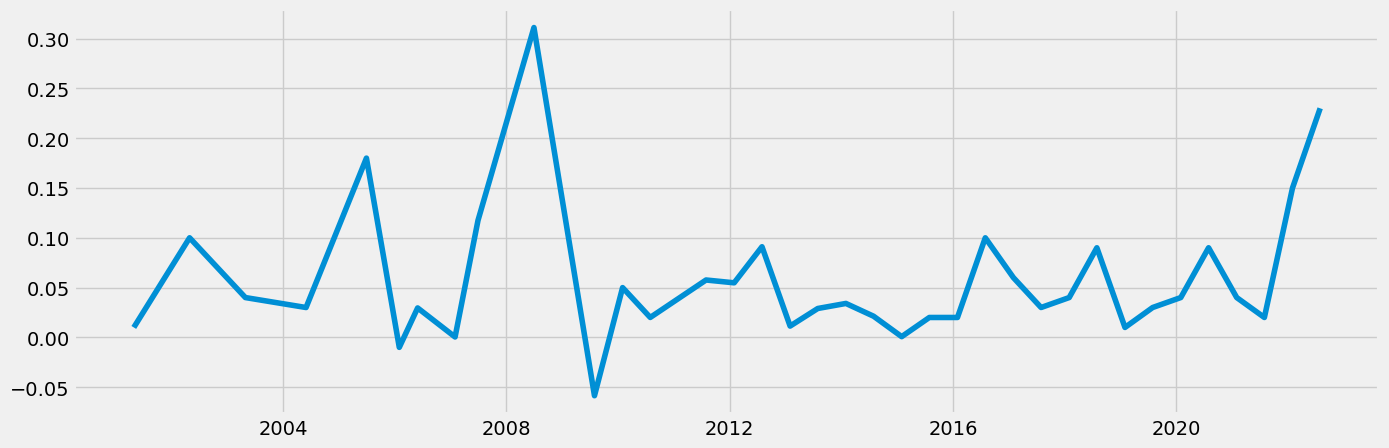

In [58]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [59]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -5.601423
p-value                         0.000001
Number of Lags Used             0.000000
Number of Observations Used    35.000000
Critical Value (1%)            -3.632743
Critical Value (5%)            -2.948510
Critical Value (10%)           -2.613017
dtype: float64


Now, the test statistic is less than the critical value meaning the data is stationary.

#### #9 Check data's autocorrelations

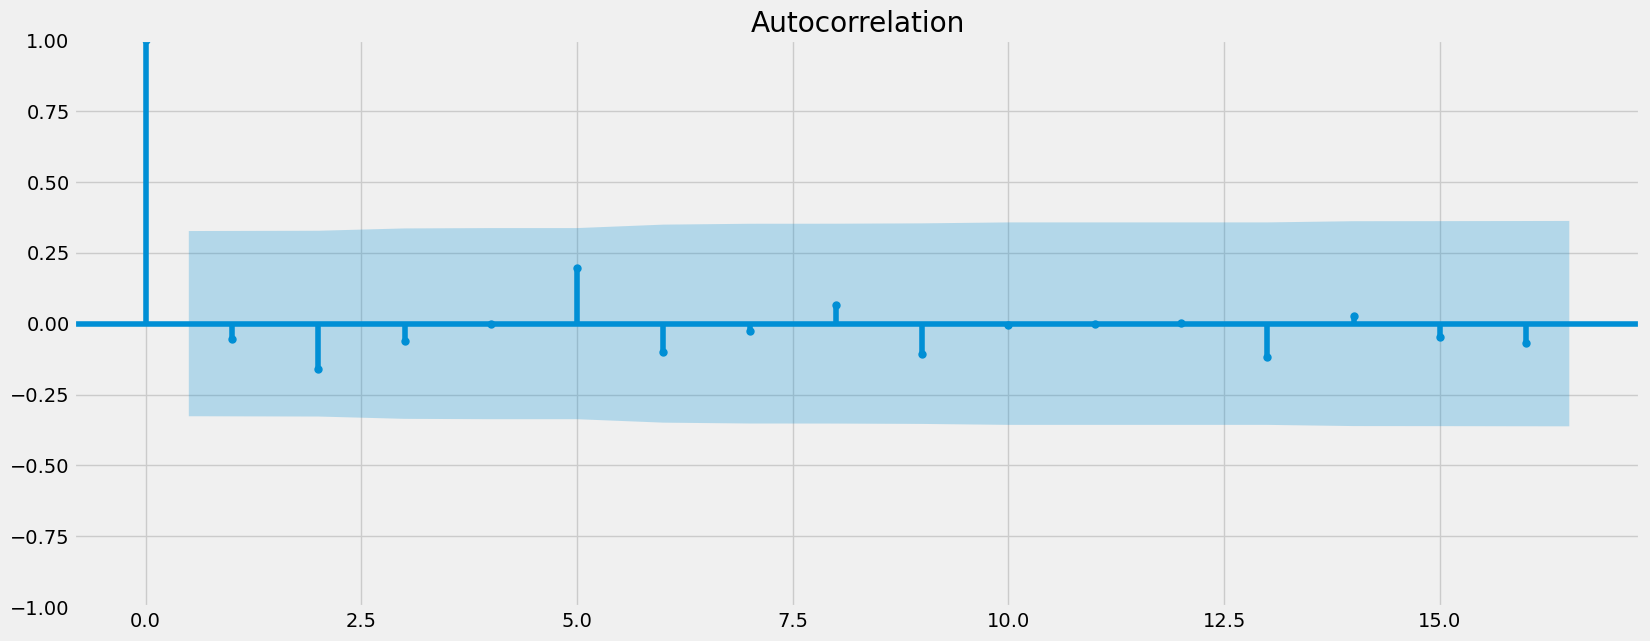

In [61]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_diff)
plt.show()

There is only one line above the blue edge of the confidence interval, meaning the differencing was successful.